In [1]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import copy
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('01.csv')
data = df
df

year  legal entities in accommodation  \
0  2015                            18937   
1  2016                            19496   
2  2017                            19780   
3  2018                            20614   
4  2019                            23793   

   number of employees in accommodation  turnover in accommodation  \
0                                 191.2                     3648.2   
1                                 186.3                     3811.1   
2                                 182.1                     3963.9   
3                                 178.0                     4059.7   
4                                 182.0                     4343.6   

   room revenue in accommodation  meal revenue in accommodation  \
0                         1803.1                         1366.1   
1                         1907.2                         1405.8   
2                         2051.2                         1403.3   
3                         2130.6                         1407.7   
4                         2345.6                         1463.0   

   number of rooms in accommodation  number of beds in accommodation  \
0                             337.2                            549.7   
1                             378.3                            605.5   
2                             393.2                            626.2   
3                             394.8                            637.3   
4                             422.8                            677.5   

   legal entities in catering  number of employees in catering  \
0                       25947                            222.1   
1                       26359                            221.1   
2                       25884                            223.2   
3                       26258                            234.2   
4                       29918                            252.8   

   turnover in catering  meal revenue in catering  
0                4864.0                    4343.5  
1                5127.1                    4562.1  
2                5312.8                    4732.1  
3                5622.9                    4997.7  
4                6557.4                    5886.6

In [3]:
data.drop('year', axis=1, inplace=True)

data.describe()

legal entities in accommodation  number of employees in accommodation  \
count                         5.000000                              5.000000   
mean                      20524.000000                            183.920000   
std                        1925.055194                              5.017669   
min                       18937.000000                            178.000000   
25%                       19496.000000                            182.000000   
50%                       19780.000000                            182.100000   
75%                       20614.000000                            186.300000   
max                       23793.000000                            191.200000   

       turnover in accommodation  room revenue in accommodation  \
count                   5.000000                       5.000000   
mean                 3965.300000                    2047.540000   
std                   262.847037                     209.283511   
min                  3648.200000                    1803.100000   
25%                  3811.100000                    1907.200000   
50%                  3963.900000                    2051.200000   
75%                  4059.700000                    2130.600000   
max                  4343.600000                    2345.600000   

       meal revenue in accommodation  number of rooms in accommodation  \
count                       5.000000                          5.000000   
mean                     1409.180000                        385.260000   
std                        34.643427                         31.310988   
min                      1366.100000                        337.200000   
25%                      1403.300000                        378.300000   
50%                      1405.800000                        393.200000   
75%                      1407.700000                        394.800000   
max                      1463.000000                        422.800000   

       number of beds in accommodation  legal entities in catering  \
count                         5.000000                    5.000000   
mean                        619.240000                26873.200000   
std                          46.886651                 1713.916772   
min                         549.700000                25884.000000   
25%                         605.500000                25947.000000   
50%                         626.200000                26258.000000   
75%                         637.300000                26359.000000   
max                         677.500000                29918.000000   

       number of employees in catering  turnover in catering  \
count                          5.00000              5.000000   
mean                         230.68000           5496.840000   
std                           13.44459            654.168077   
min                          221.10000           4864.000000   
25%                          222.10000           5127.100000   
50%                          223.20000           5312.800000   
75%                          234.20000           5622.900000   
max                          252.80000           6557.400000   

       meal revenue in catering  
count                  5.000000  
mean                4904.400000  
std                  598.933869  
min                 4343.500000  
25%                 4562.100000  
50%                 4732.100000  
75%                 4997.700000  
max                 5886.600000

<AxesSubplot:>

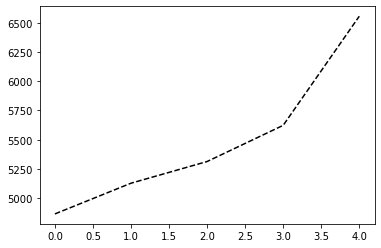

In [4]:
plt.figure()
df["turnover in catering"].head(100).plot(style="k--",label="Series")

<AxesSubplot:xlabel='turnover in accommodation'>

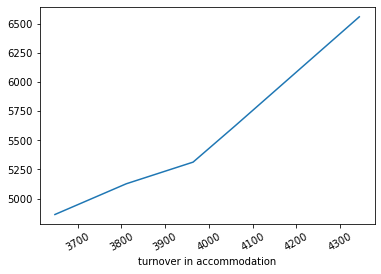

In [5]:
df.groupby('turnover in accommodation')['turnover in catering'].mean().plot(rot = 30)

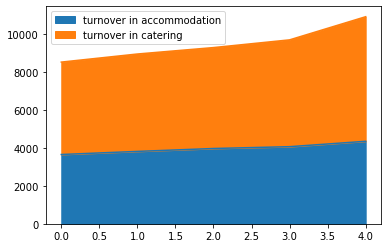

In [6]:
pf = pd.read_csv('01.csv')
score = pf[['turnover in accommodation','turnover in catering']]
score.plot.area()
plt.legend()
plt.show()

<AxesSubplot:xlabel='turnover in accommodation', ylabel='turnover in catering'>

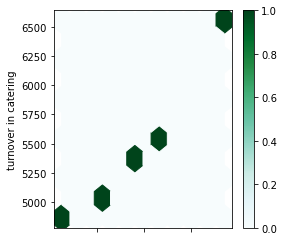

In [7]:
df=pd.read_csv('01.csv')
df1 = df[['turnover in accommodation','turnover in catering']]
df1.plot.hexbin(x='turnover in accommodation',y='turnover in catering',gridsize=10,figsize=(4,4))

In [8]:
test2=df[['number of employees in accommodation','turnover in accommodation','number of employees in catering','turnover in catering']]
test2

number of employees in accommodation  turnover in accommodation  \
0                                 191.2                     3648.2   
1                                 186.3                     3811.1   
2                                 182.1                     3963.9   
3                                 178.0                     4059.7   
4                                 182.0                     4343.6   

   number of employees in catering  turnover in catering  
0                            222.1                4864.0  
1                            221.1                5127.1  
2                            223.2                5312.8  
3                            234.2                5622.9  
4                            252.8                6557.4

<AxesSubplot:xlabel='number of employees in accommodation'>

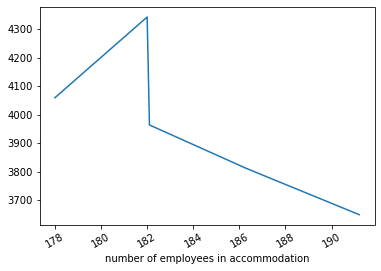

In [9]:
df.groupby('number of employees in accommodation')['turnover in accommodation'].mean().plot(rot = 30)

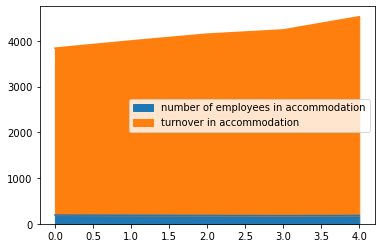

In [10]:
pf = pd.read_csv('01.csv')
score = pf[['number of employees in accommodation','turnover in accommodation']]
score.plot.area()
plt.legend()
plt.show()

<AxesSubplot:xlabel='number of employees in catering'>

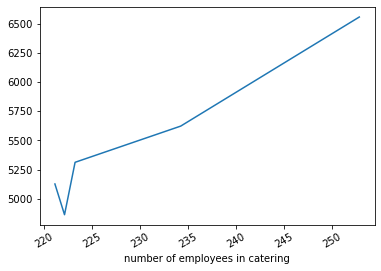

In [11]:
df.groupby('number of employees in catering')['turnover in catering'].mean().plot(rot = 30)

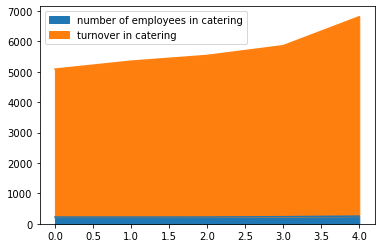

In [12]:
pf = pd.read_csv('01.csv')
score = pf[['number of employees in catering','turnover in catering']]
score.plot.area()
plt.legend()
plt.show()

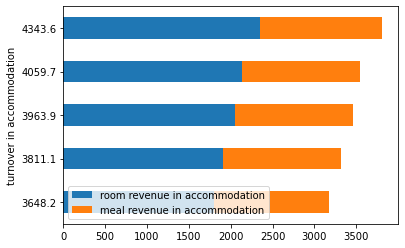

In [13]:
df=pd.read_csv('01.csv')
df1 = df[['turnover in accommodation','room revenue in accommodation','meal revenue in accommodation']]
avgLevel=df1.groupby('turnover in accommodation').mean()
avgLevel.plot.barh(stacked=True)
plt.legend(loc='lower left')
plt.show()

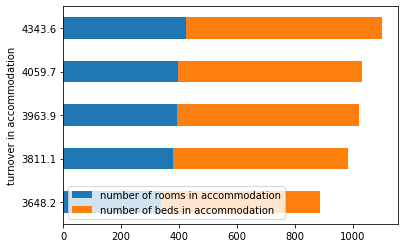

In [14]:
df2 = df[['turnover in accommodation','number of rooms in accommodation','number of beds in accommodation']]
avgLevel=df2.groupby('turnover in accommodation').mean()
avgLevel.plot.barh(stacked=True)
plt.legend(loc='lower left')
plt.show()

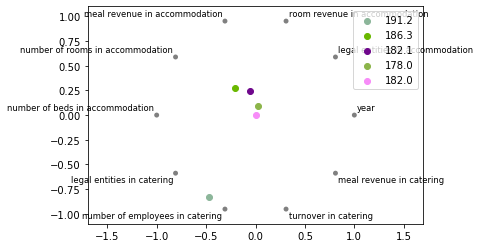

In [15]:
from pandas.plotting import radviz  
plt.figure();
radviz(df.groupby("turnover in accommodation").mean(), "number of employees in accommodation");

<AxesSubplot:>

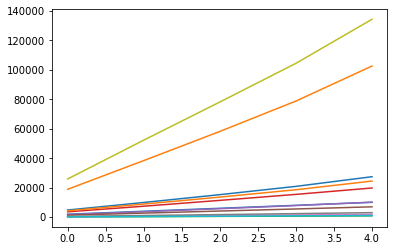

In [16]:
df = pd.read_csv('01.csv')
df = df.cumsum()
df.plot(legend=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

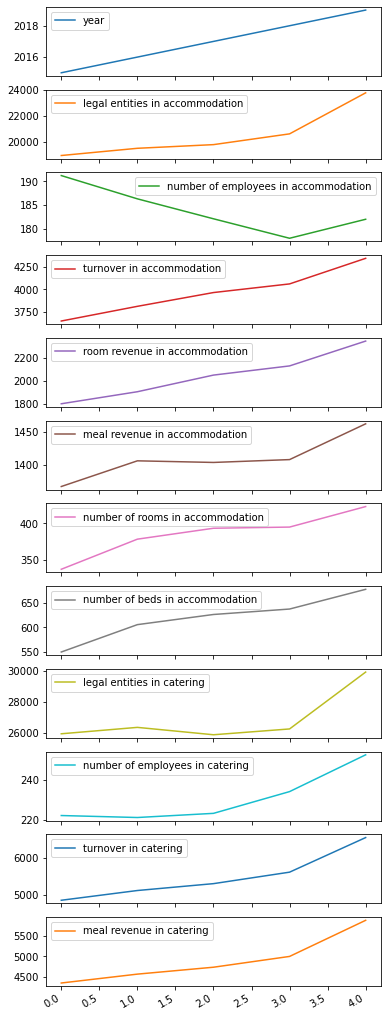

In [20]:
df = pd.read_csv('01.csv')
df.plot(subplots=True, figsize=(6, 20))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

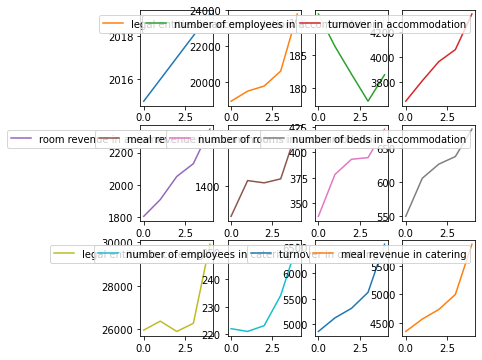

In [47]:
df = pd.read_csv('01.csv')
df.head(150).plot(subplots=True, layout=(3, 4), figsize=(6, 6), sharex=False)

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='legal entities in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='number of employees in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='turnover in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='room revenue in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='meal revenue in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='number of rooms in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='number of beds in accommodation', ylabel='year'>,
        <AxesSubplot:xlabel='legal entities in catering', ylabel='year'>,
        <AxesSubplot:xlabel='number of employees in catering', ylabel='year'>,
        <AxesSubplot:xlabel='turnover in catering', ylabel='year'>,
        <AxesSubplot:xlabel='meal revenue in catering', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='legal entities in accommodation'>,
        <AxesSubplot:xlabe

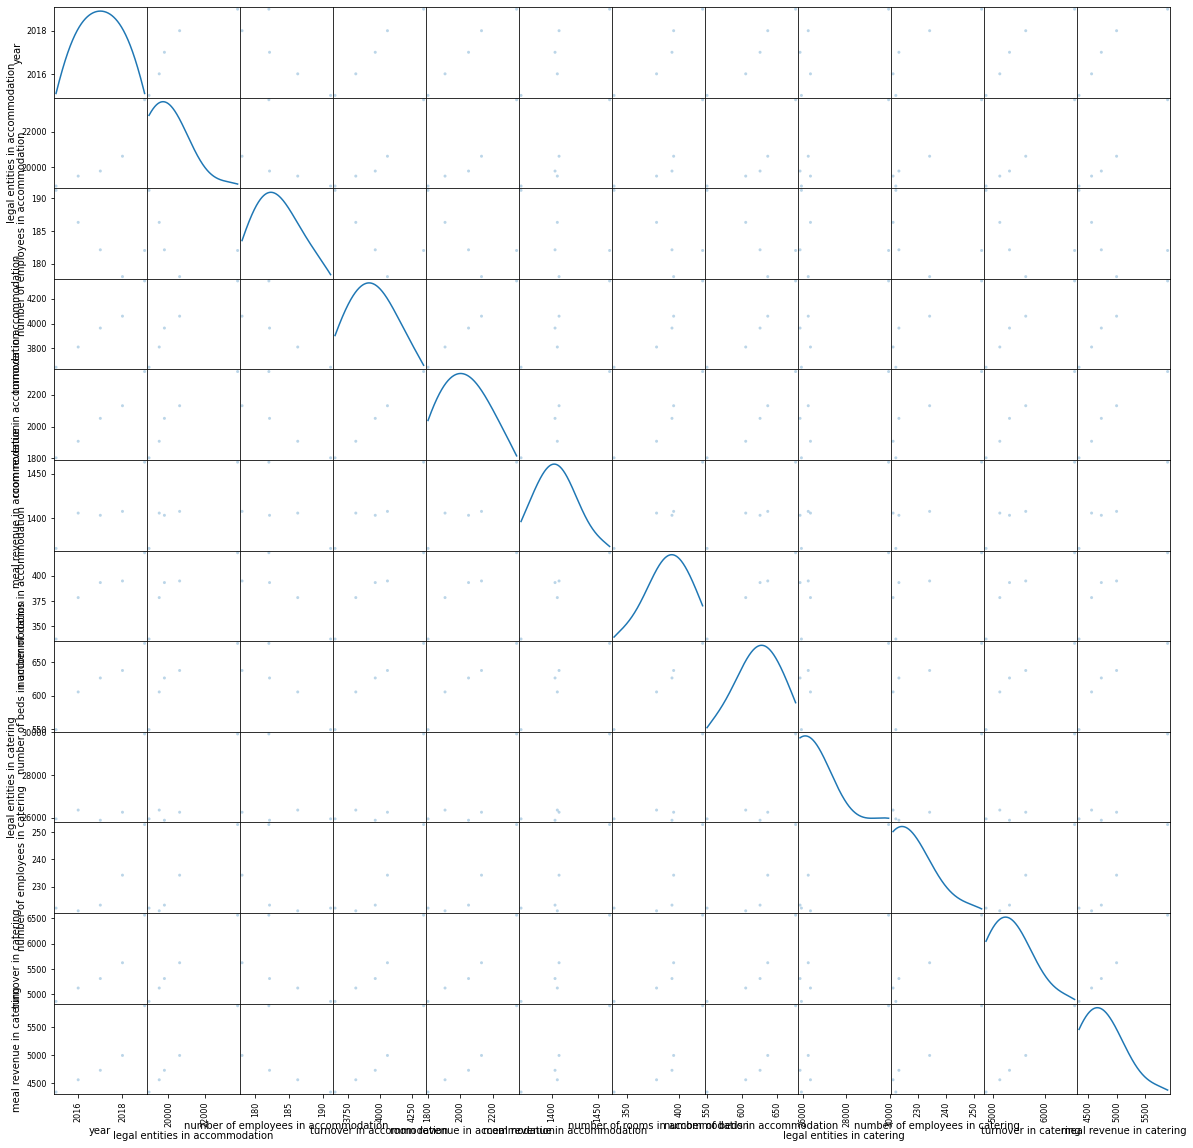

In [48]:
from pandas.plotting import scatter_matrix
df= pd.DataFrame(df)
scatter_matrix(df,alpha=0.3,figsize=(20,20),diagonal='kde')

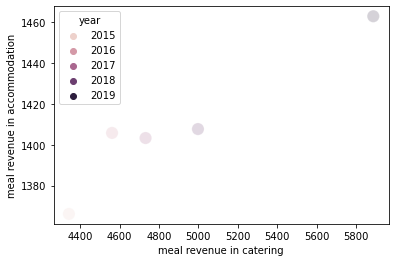

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.scatterplot(data=df,x='meal revenue in catering',y='meal revenue in accommodation',hue='year',style_order='year',alpha=0.2,s=150)
              
plt.show()

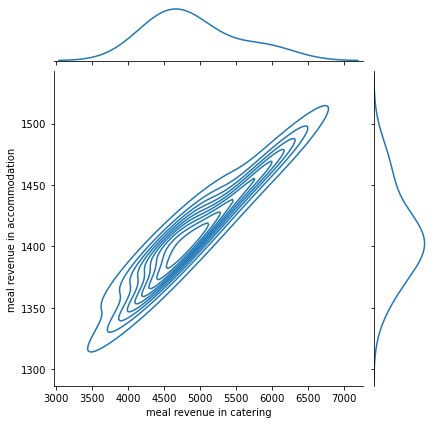

In [50]:
sb.jointplot(data=df,x='meal revenue in catering',y='meal revenue in accommodation',kind='kde')
plt.show()

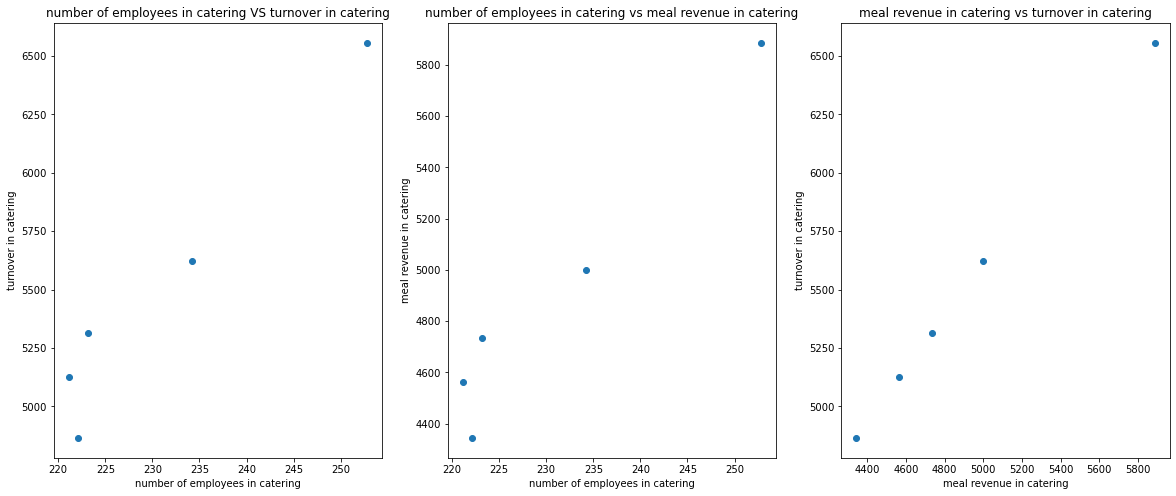

In [51]:
#Scatter plot of scores in different subjects to visualize correlation among them
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt.scatter(df['number of employees in catering'],df['turnover in catering'])
plt.title('number of employees in catering VS turnover in catering')
plt.xlabel('number of employees in catering')
plt.ylabel('turnover in catering')

plt.subplot(1,3,2)
plt.scatter(df['number of employees in catering'],df['meal revenue in catering'])
plt.title('number of employees in catering vs meal revenue in catering')
plt.xlabel('number of employees in catering')
plt.ylabel('meal revenue in catering')

plt.subplot(1,3,3)
plt.scatter(df['meal revenue in catering'],df['turnover in catering'])
plt.title('meal revenue in catering vs turnover in catering')
plt.xlabel('meal revenue in catering')
plt.ylabel('turnover in catering')


plt.show()

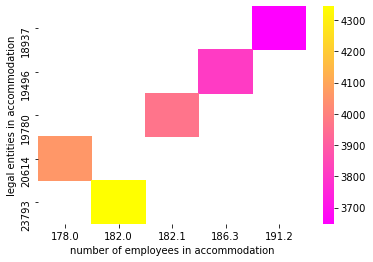

In [52]:
df2=df.pivot_table(index='legal entities in accommodation',columns='number of employees in accommodation',values='turnover in accommodation')
sb.heatmap(df2,cmap='spring')
plt.show()

Text(0.5, 1.0, 'Covariance Plot')

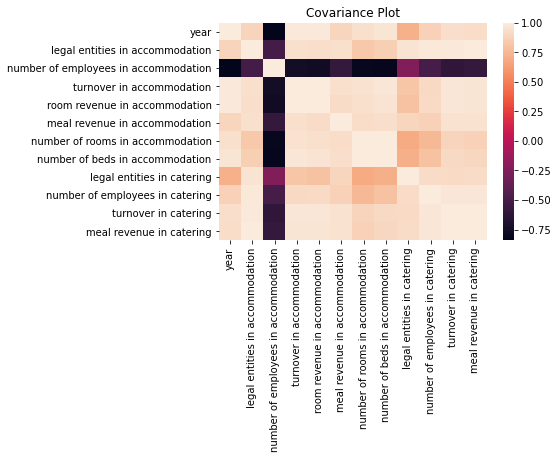

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())
plt.title('Covariance Plot')

In [54]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
#sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

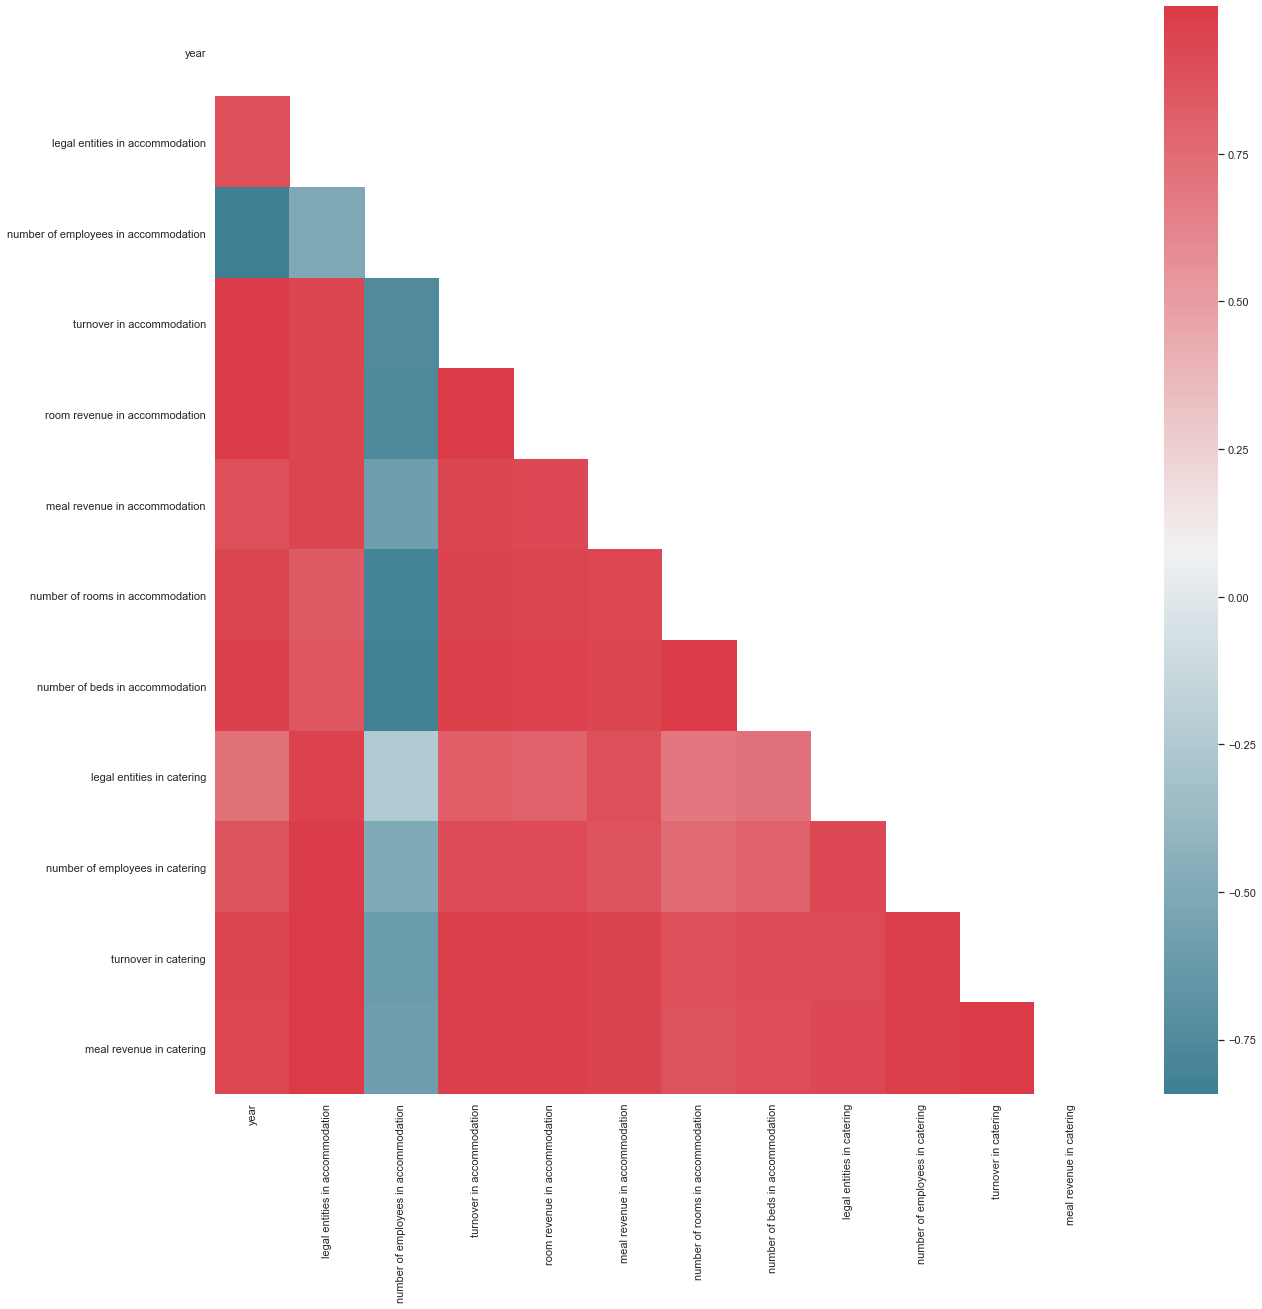

In [55]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

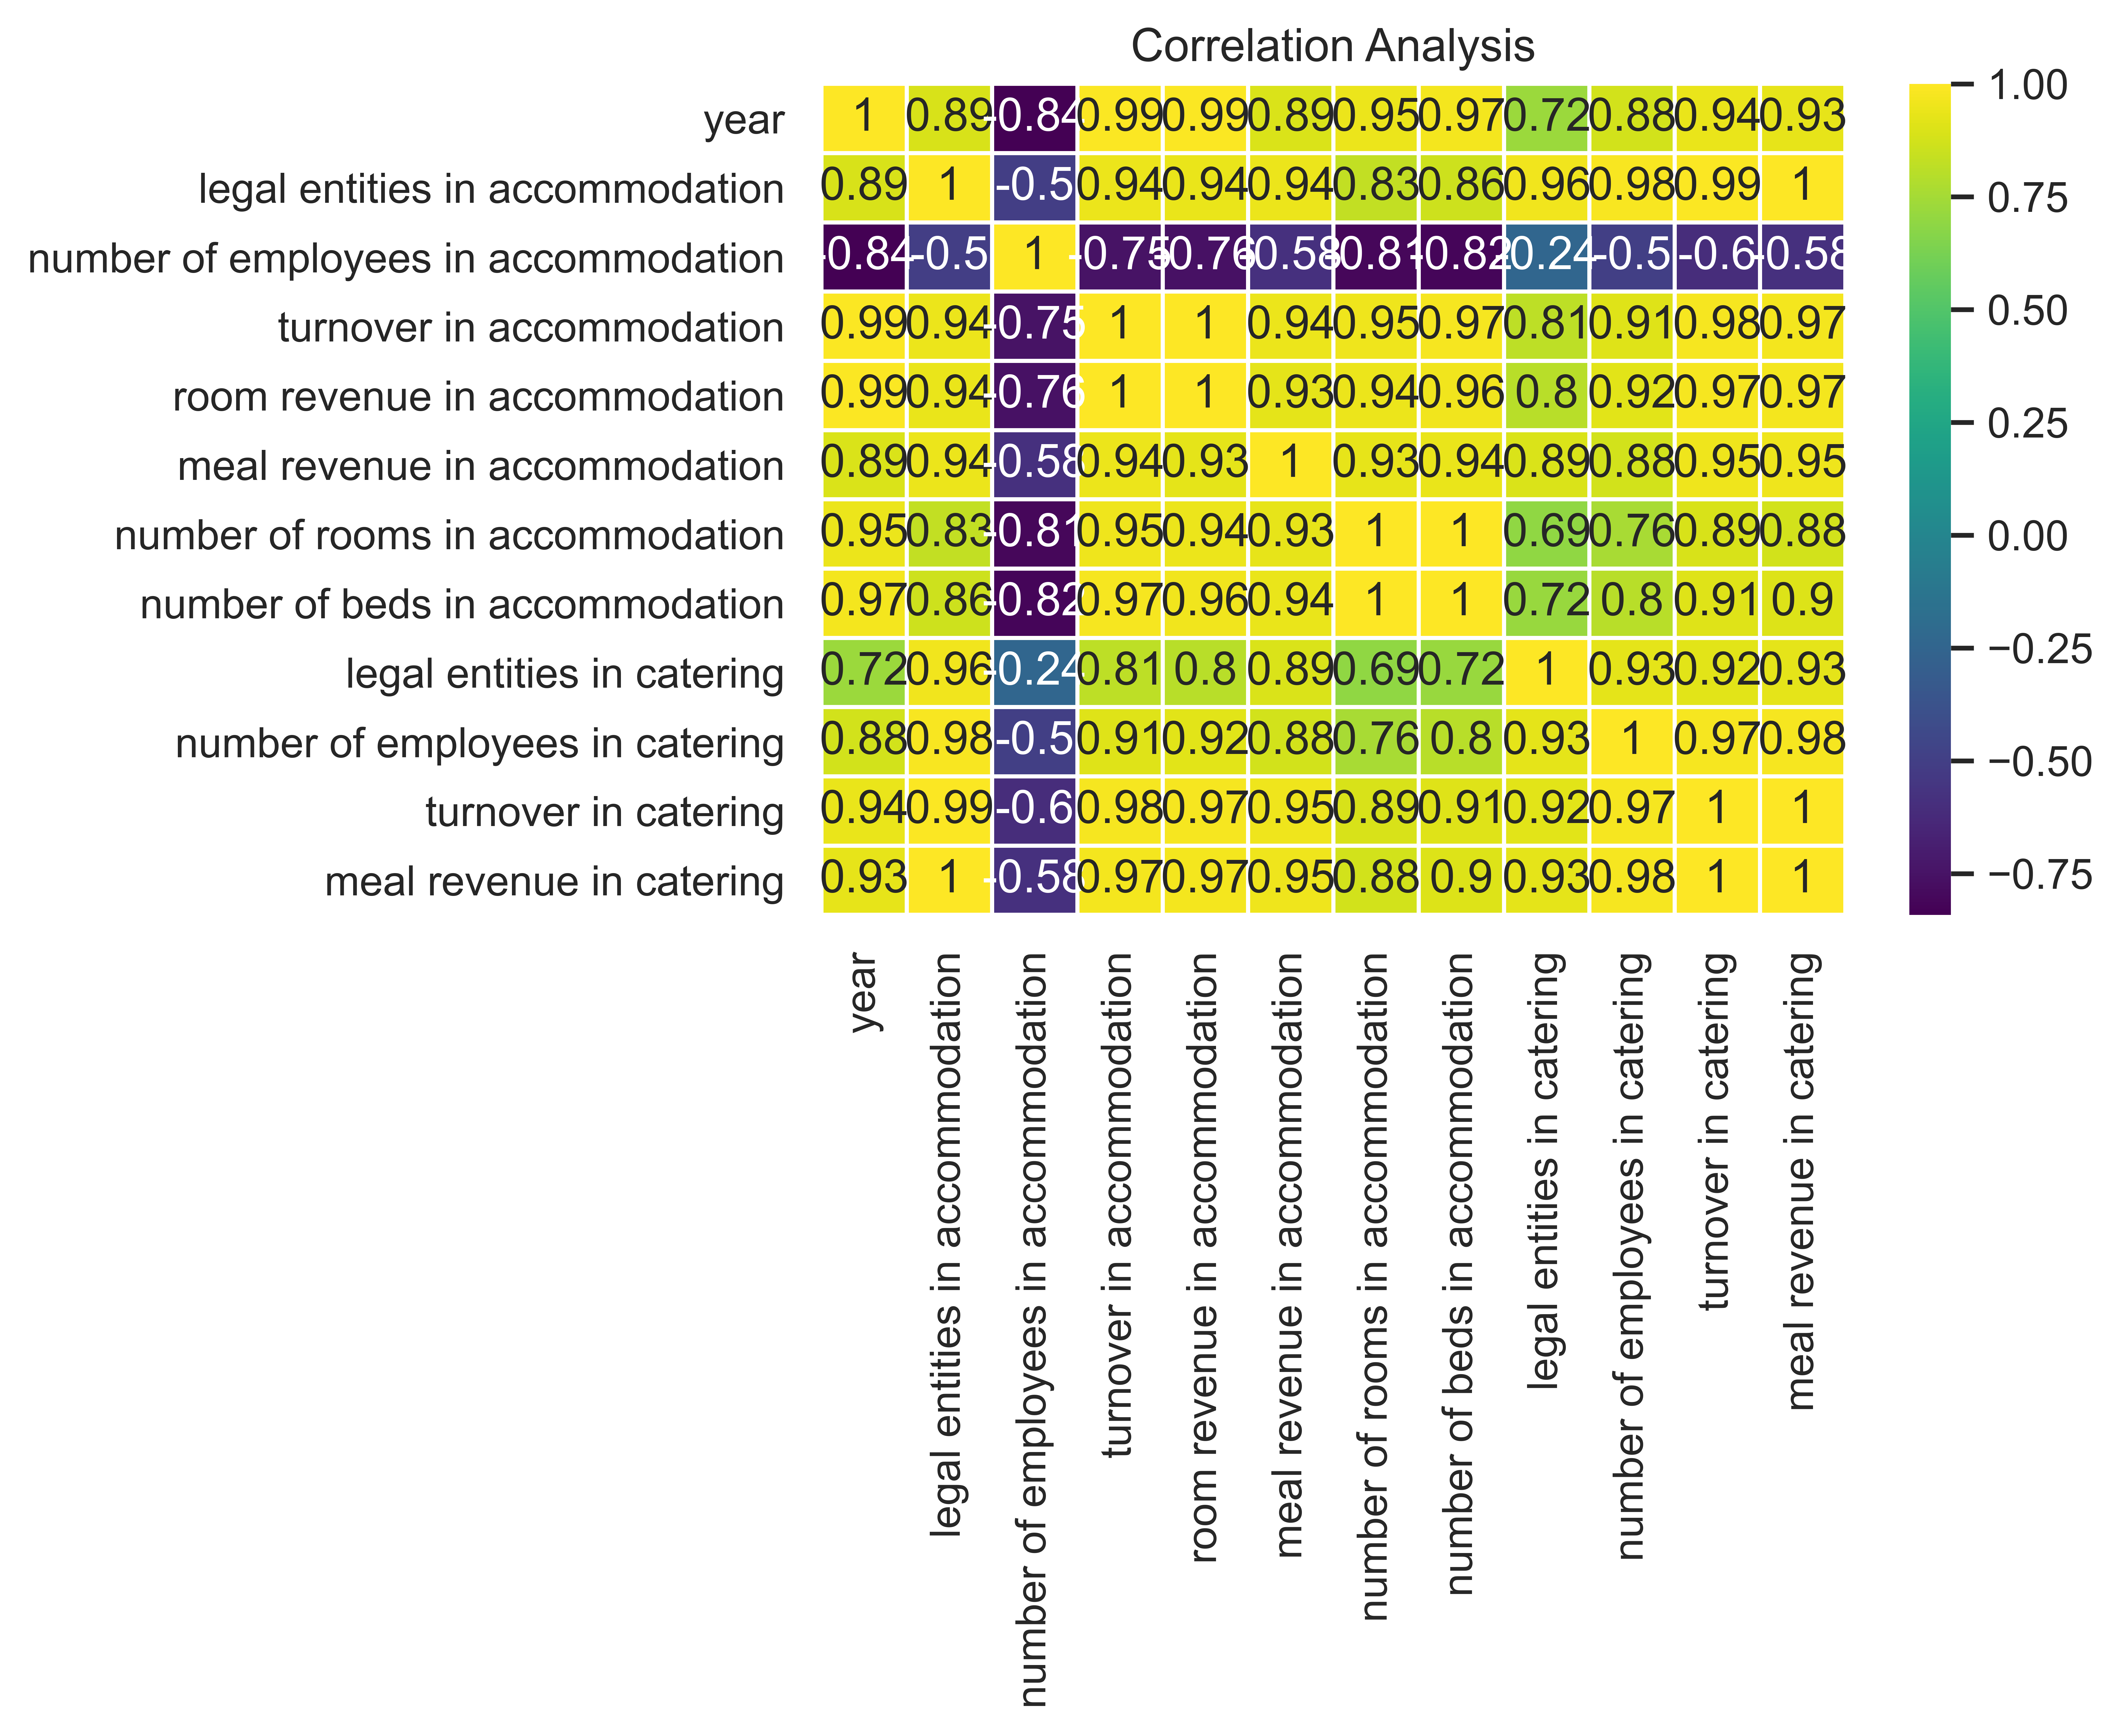

In [56]:
plt.figure(dpi=1000)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks
plt.yticks
plt.show()

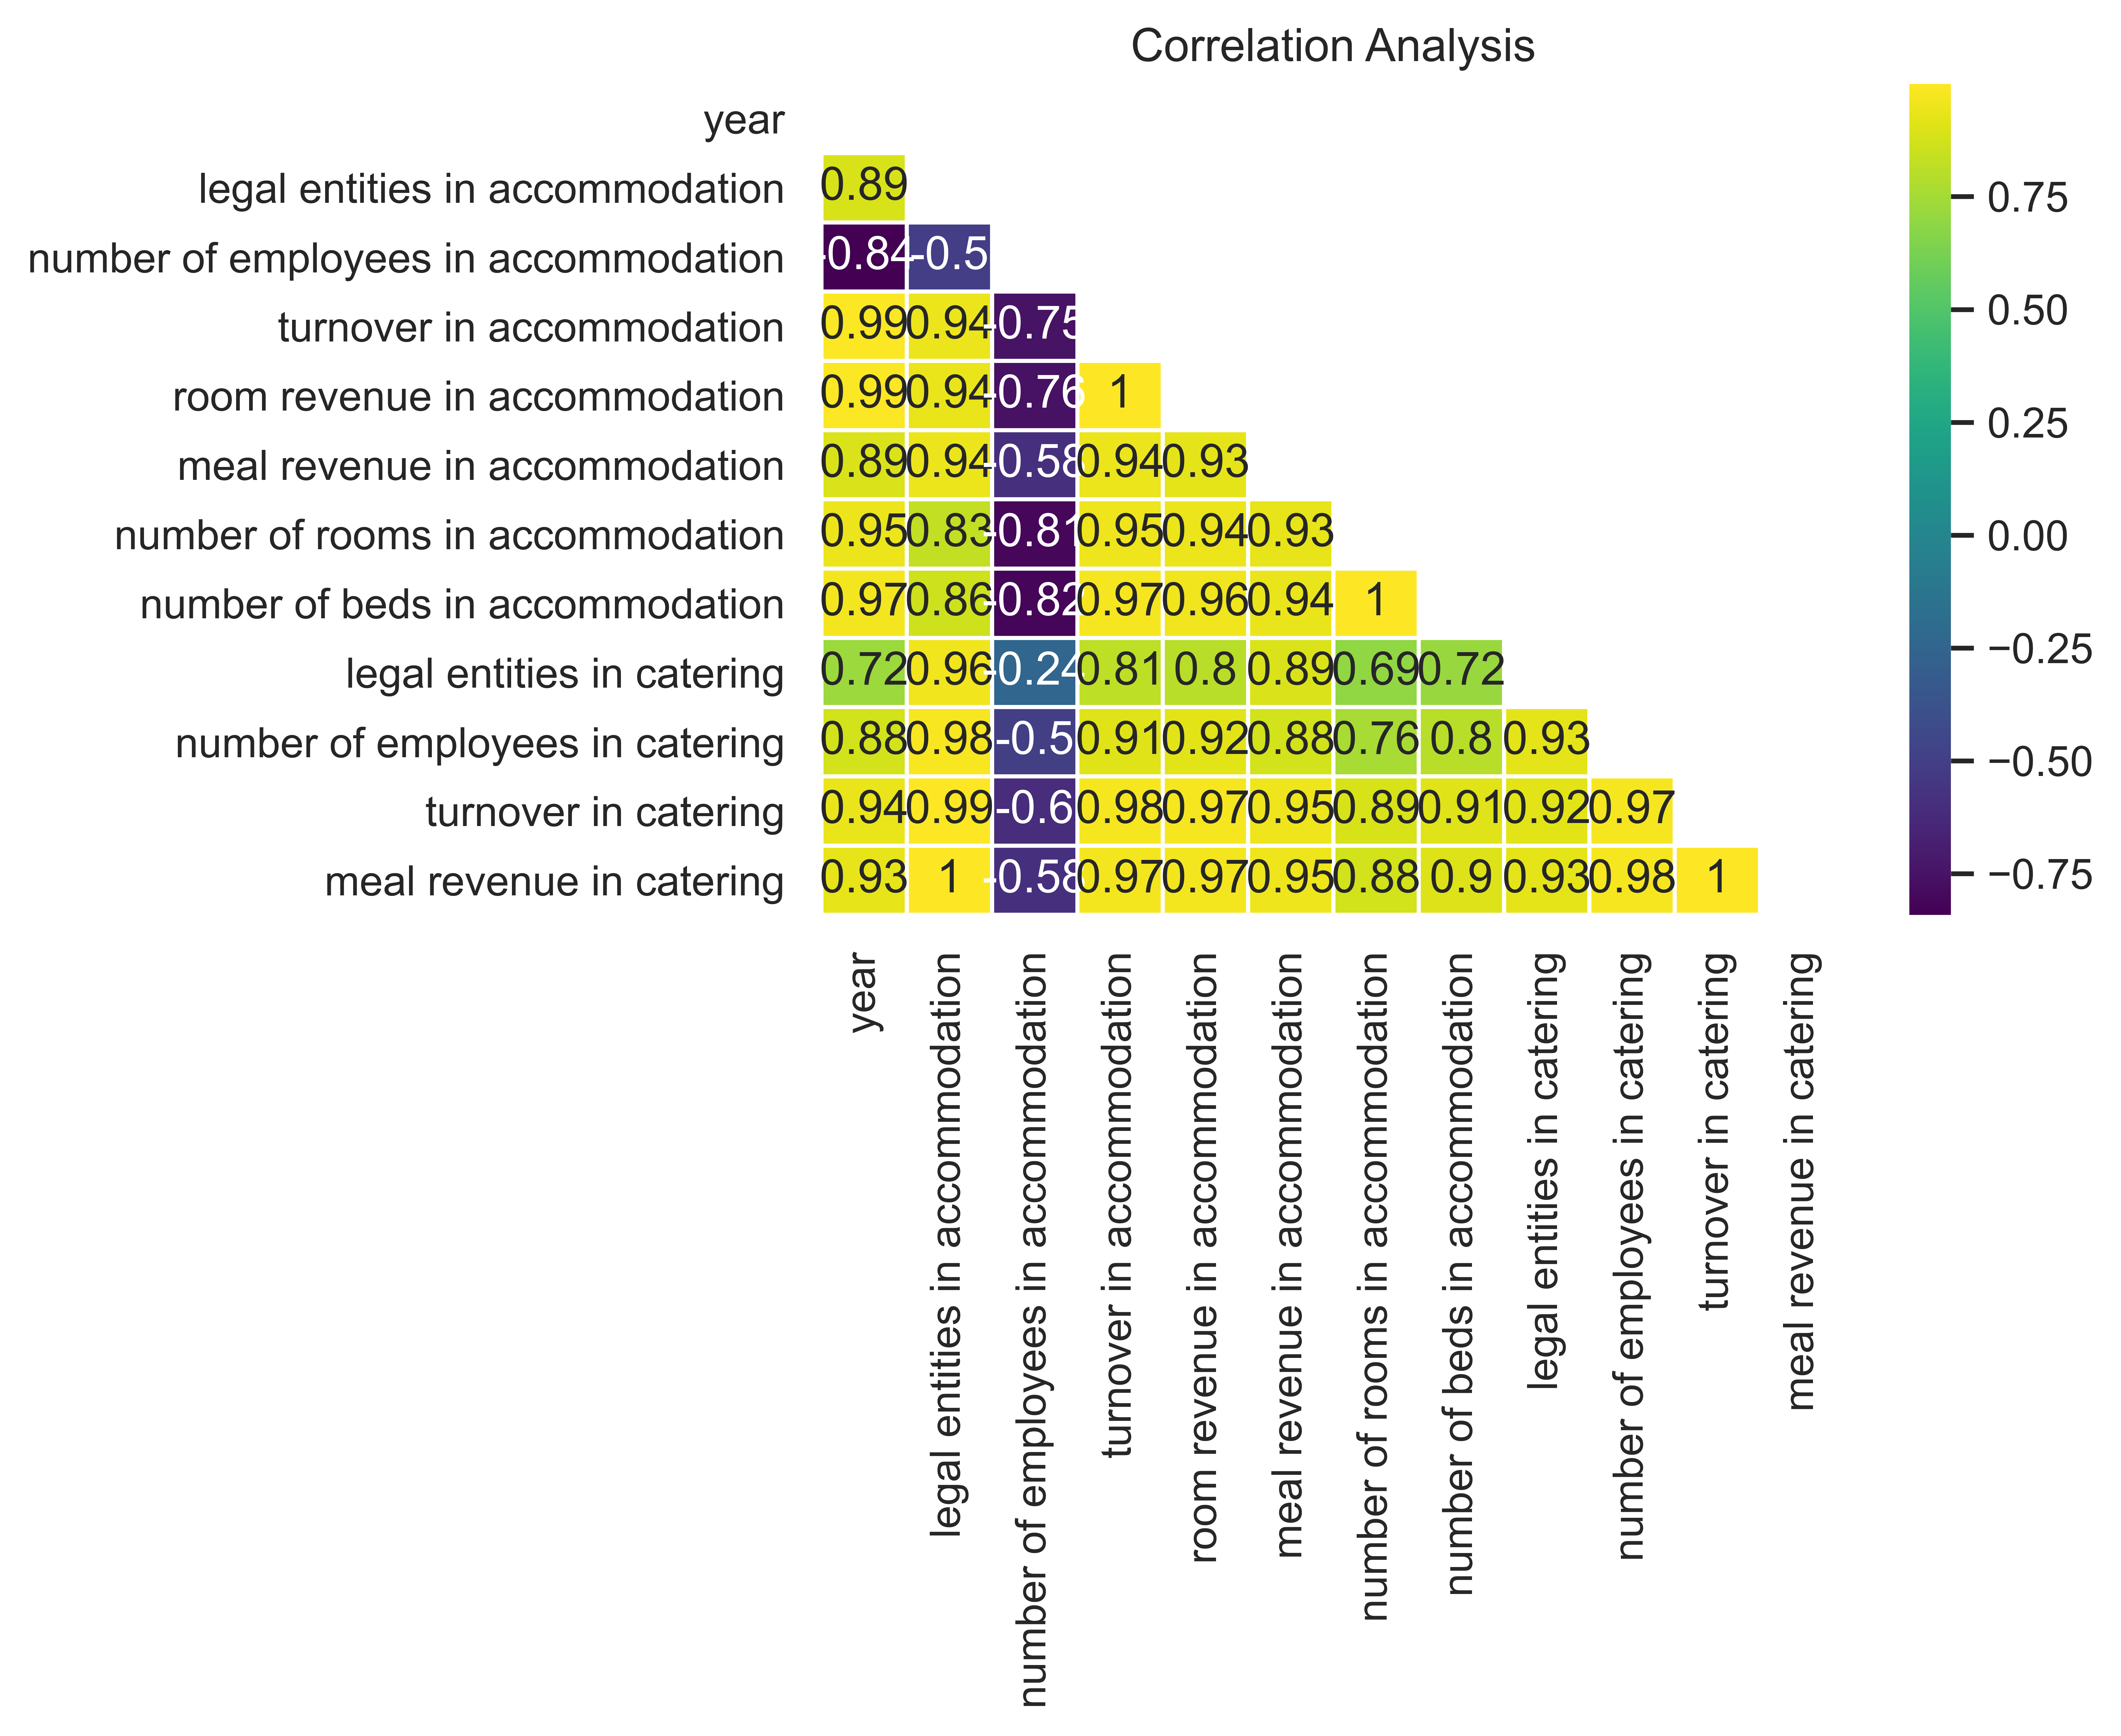

In [57]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=1000)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),mask=mask,annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks
plt.show()

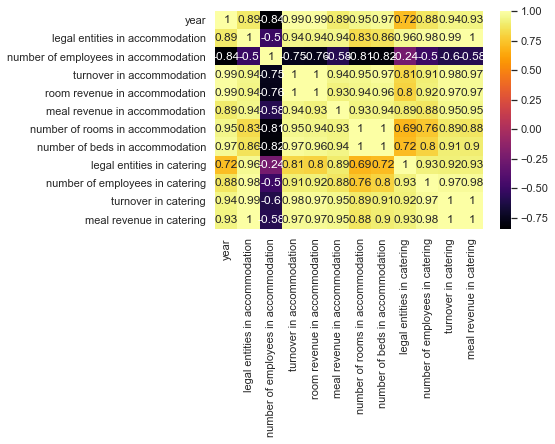

In [58]:
sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()

In [59]:
base = pd.read_csv('01.csv')
#Importing Libraries

import seaborn as sns
import matplotlib.pyplot as plt

count       5.000000
mean     1409.180000
std        34.643427
min      1366.100000
25%      1403.300000
50%      1405.800000
75%      1407.700000
max      1463.000000
Name: meal revenue in accommodation, dtype: float64

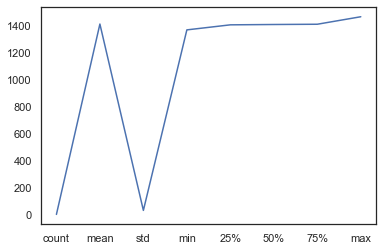

In [60]:
mean_score_meal_accommodation = base['meal revenue in accommodation']
mean_score_meal_catering = base['meal revenue in catering']
#plt.figure(figsize = (12,8))
mean_score_meal_accommodation.describe().plot()
mean_score_meal_accommodation.describe()

count       5.000000
mean     4904.400000
std       598.933869
min      4343.500000
25%      4562.100000
50%      4732.100000
75%      4997.700000
max      5886.600000
Name: meal revenue in catering, dtype: float64

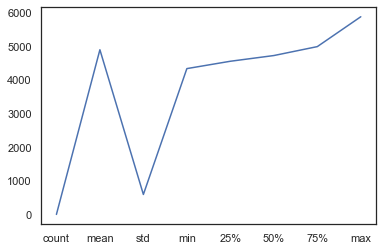

In [61]:
mean_score_meal_catering.describe().plot()
mean_score_meal_catering.describe()

In [62]:
pip install dabl

Note: you may need to restart the kernel to use updated packages.


In [63]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import dabl

In [64]:
import pandas as pd
data=pd.read_csv('01.csv')

Target looks like regression


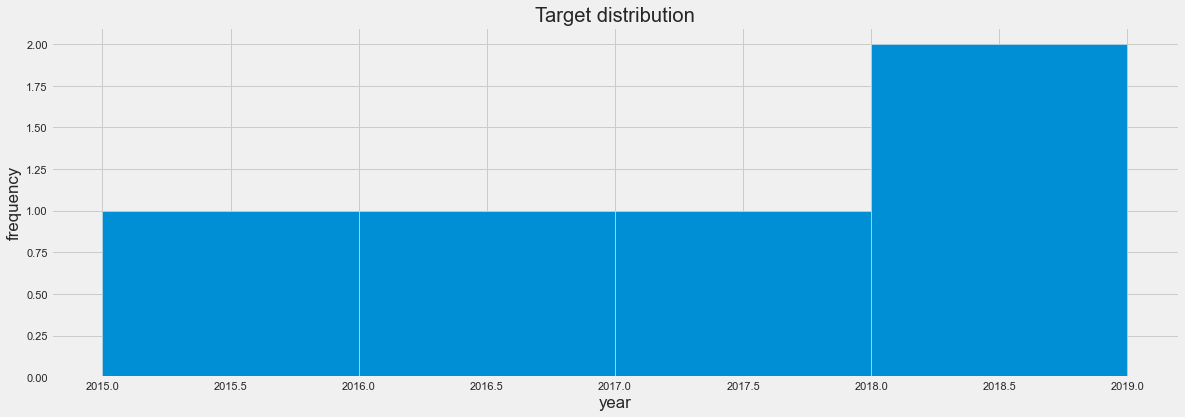

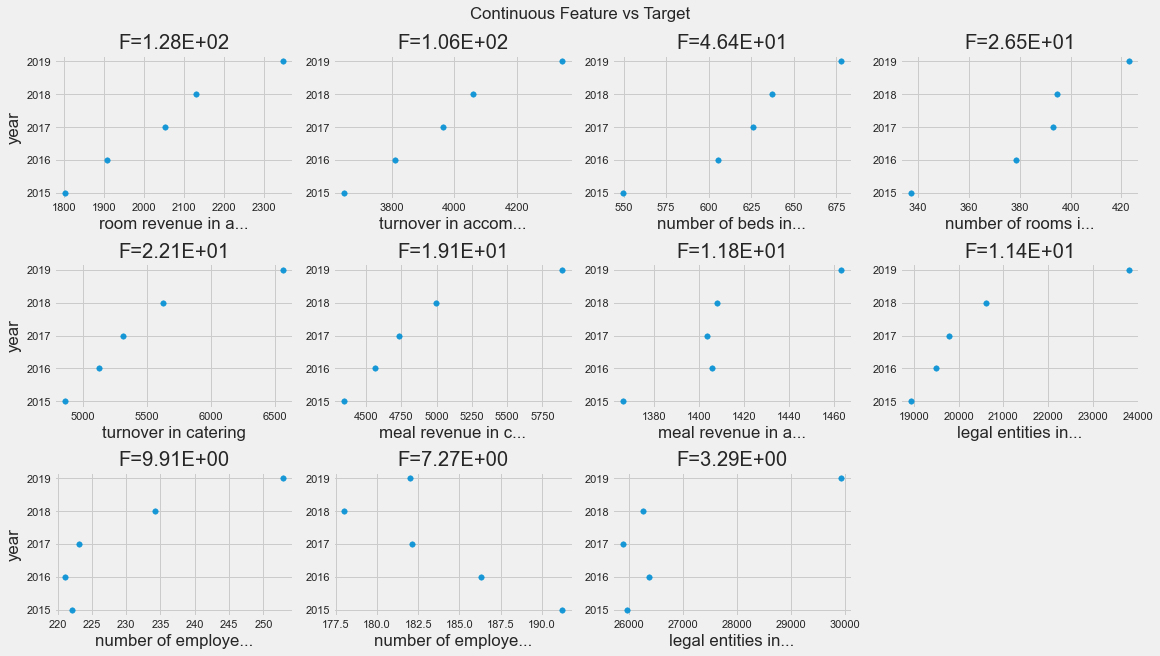

In [65]:
# comparison of all other attributes with respect to Math Marks
import matplotlib.pyplot as plt
import dabl as dabl
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'year')

/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


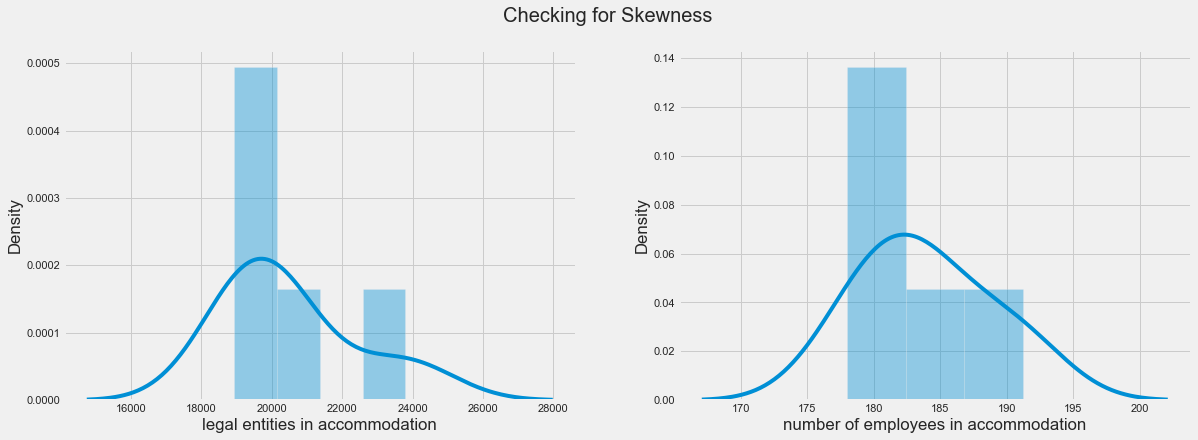

In [66]:
plt.subplot(1, 2, 1)
sns.distplot(data['legal entities in accommodation'])

plt.subplot(1, 2, 2)
sns.distplot(data['number of employees in accommodation'])
plt.suptitle('Checking for Skewness', fontsize = 20)


plt.show()

/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


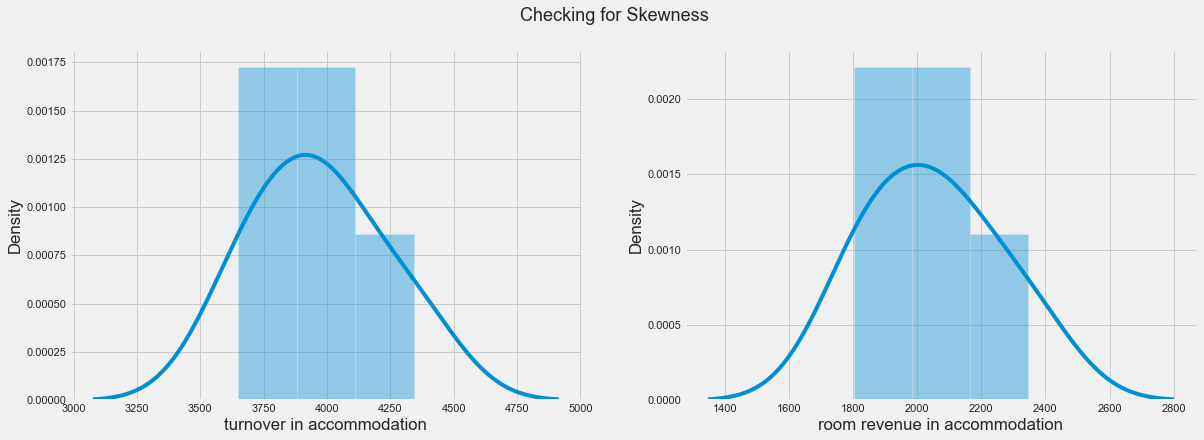

In [67]:
plt.subplot(1, 2, 1)
sns.distplot(data['turnover in accommodation'])

plt.subplot(1, 2, 2)
sns.distplot(data['room revenue in accommodation'])
plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()


/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


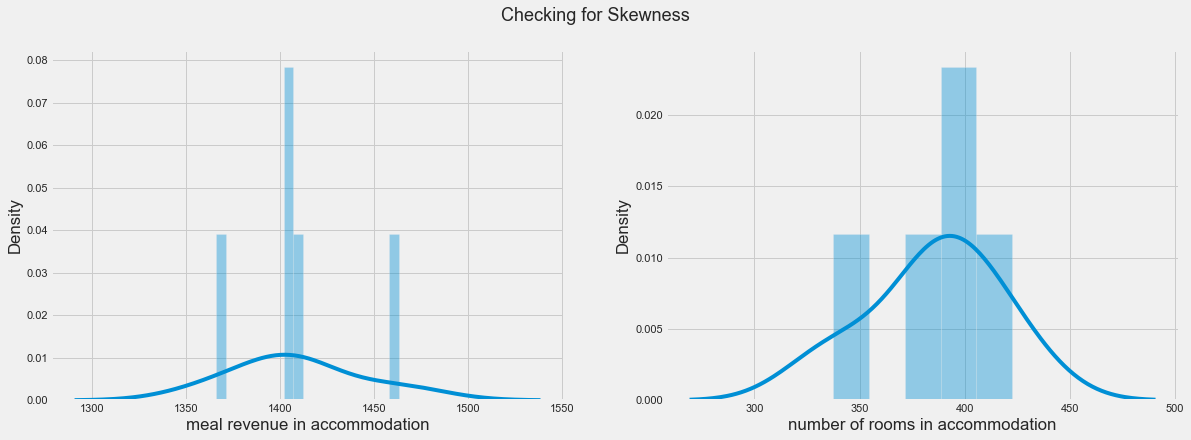

In [68]:
plt.subplot(1, 2, 1)
sns.distplot(data['meal revenue in accommodation']) 

plt.subplot(1, 2, 2)
sns.distplot(data['number of rooms in accommodation'])
plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


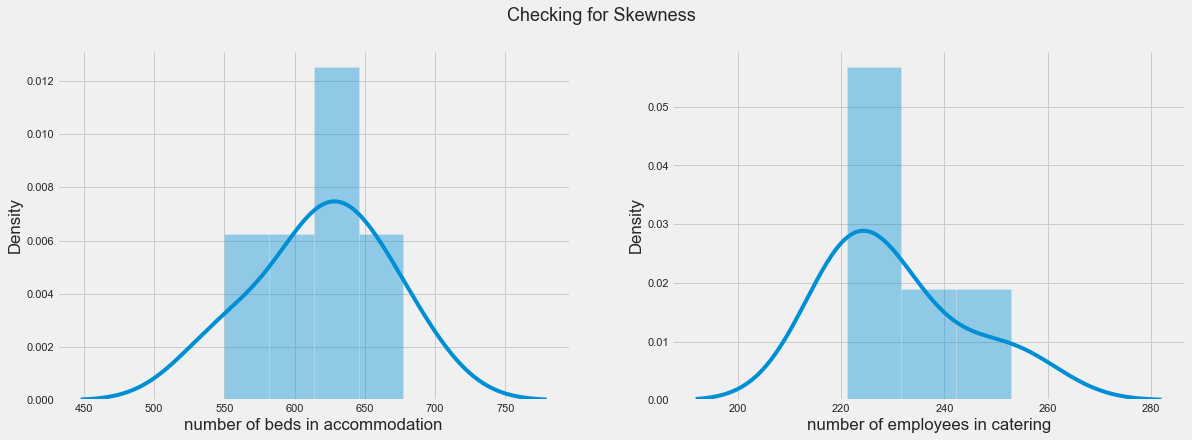

In [69]:
plt.subplot(1, 2, 1)
sns.distplot(data['number of beds in accommodation'])

plt.subplot(1, 2, 2)
sns.distplot(data['number of employees in catering'])
plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alexyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


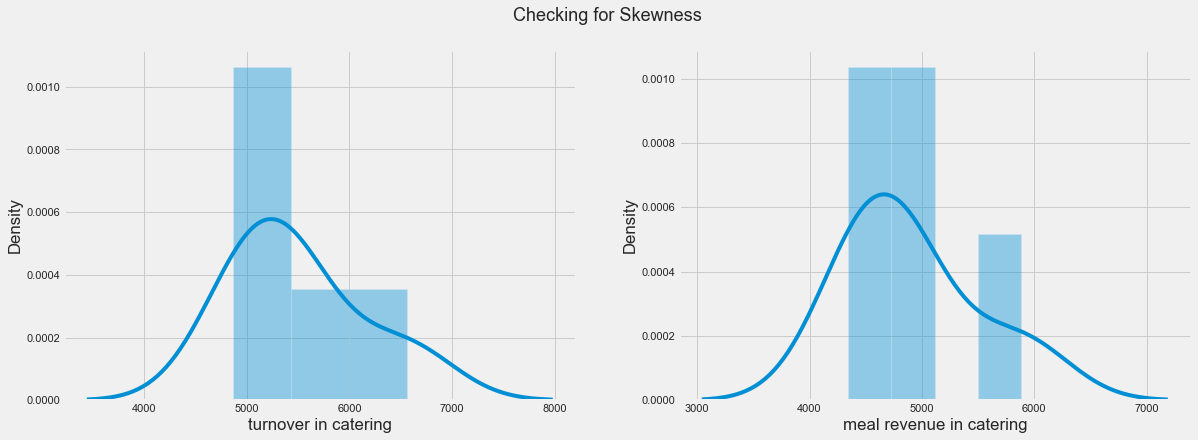

In [70]:
plt.subplot(1, 2, 1)
sns.distplot(data['turnover in catering'])

plt.subplot(1, 2, 2)
sns.distplot(data['meal revenue in catering'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()